## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import tensorflow

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = tensorflow.keras.layers.Input([x_train.shape[-1]])
    x = tensorflow.keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = tensorflow.keras.layers.Dense(units=256, activation="relu")(x)
    x = tensorflow.keras.layers.Dense(units=128, activation="relu")(x)
    out = tensorflow.keras.layers.Dense(units=10, activation="softmax")(x)
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.9291 - accuracy: 0.3004 - val_loss: 1.7442 - val_accuracy: 0.3706
Epoch 2/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.7015 - accuracy: 0.3906 - val_loss: 1.6393 - val_accuracy: 0.4092
Epoch 3/500
50000/50000 [==============================] - 3s 50us/sample - loss: 1.6167 - accuracy: 0.4222 - val_loss: 1.5546 - val_accuracy: 0.4494
Epoch 4/500
50000/50000 [==============================] - 3s 51us/sample - loss: 1.5534 - accuracy: 0.4468 - val_loss: 1.5332 - val_accuracy: 0.4515
Epoch 5/500
50000/50000 [==============================] - 3s 54us/sample - loss: 1.5072 - accuracy: 0.4657 - val_loss: 1.5523 - val_accuracy: 0.4493
Epoch 6/500
50000/50000 [==============================] - 3s 52us/sample - loss: 1.4789 - accuracy: 0.4721 - val_loss: 1.4888 - val_accuracy: 0.4699
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 3s 60us/sample - loss: 0.5950 - accuracy: 0.7875 - val_loss: 1.9264 - val_accuracy: 0.5065
Epoch 56/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.5963 - accuracy: 0.7854 - val_loss: 1.8757 - val_accuracy: 0.5185
Epoch 57/500
50000/50000 [==============================] - 3s 67us/sample - loss: 0.5797 - accuracy: 0.7934 - val_loss: 1.9079 - val_accuracy: 0.5227
Epoch 58/500
50000/50000 [==============================] - 4s 70us/sample - loss: 0.5650 - accuracy: 0.7982 - val_loss: 2.0541 - val_accuracy: 0.4985
Epoch 59/500
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5757 - accuracy: 0.7939 - val_loss: 1.9480 - val_accuracy: 0.5206
Epoch 60/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.5454 - accuracy: 0.8048 - val_loss: 1.9528 - val_accuracy: 0.5147
Epoch 61/500
50000/50000 [==============================] - 3s 59us/sample - loss: 0.5633 - ac

50000/50000 [==============================] - 3s 61us/sample - loss: 0.2800 - accuracy: 0.8983 - val_loss: 3.3887 - val_accuracy: 0.4951
Epoch 110/500
50000/50000 [==============================] - 4s 80us/sample - loss: 0.2755 - accuracy: 0.8987 - val_loss: 3.6287 - val_accuracy: 0.4929
Epoch 111/500
50000/50000 [==============================] - 3s 68us/sample - loss: 0.2841 - accuracy: 0.8974 - val_loss: 3.4870 - val_accuracy: 0.4952
Epoch 112/500
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2714 - accuracy: 0.9020 - val_loss: 3.3693 - val_accuracy: 0.4962
Epoch 113/500
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2628 - accuracy: 0.9066 - val_loss: 3.5846 - val_accuracy: 0.5024
Epoch 114/500
50000/50000 [==============================] - 4s 72us/sample - loss: 0.2594 - accuracy: 0.9058 - val_loss: 3.5293 - val_accuracy: 0.4998
Epoch 115/500
50000/50000 [==============================] - 4s 83us/sample - loss: 0.2875 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.2278 - accuracy: 0.9195 - val_loss: 4.5659 - val_accuracy: 0.4863
Epoch 164/500
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2405 - accuracy: 0.9164 - val_loss: 4.7008 - val_accuracy: 0.4953
Epoch 165/500
50000/50000 [==============================] - 3s 65us/sample - loss: 0.2027 - accuracy: 0.9280 - val_loss: 4.8159 - val_accuracy: 0.4865
Epoch 166/500
50000/50000 [==============================] - 3s 65us/sample - loss: 0.1864 - accuracy: 0.9344 - val_loss: 4.7277 - val_accuracy: 0.4991
Epoch 167/500
50000/50000 [==============================] - 3s 69us/sample - loss: 0.1414 - accuracy: 0.9490 - val_loss: 4.8940 - val_accuracy: 0.4893
Epoch 168/500
50000/50000 [==============================] - 3s 62us/sample - loss: 0.1443 - accuracy: 0.9495 - val_loss: 4.8059 - val_accuracy: 0.4958
Epoch 169/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.16

Epoch 217/500
50000/50000 [==============================] - 3s 68us/sample - loss: 0.1485 - accuracy: 0.9490 - val_loss: 5.7819 - val_accuracy: 0.4886
Epoch 218/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2046 - accuracy: 0.9319 - val_loss: 5.7030 - val_accuracy: 0.4868
Epoch 219/500
50000/50000 [==============================] - 3s 65us/sample - loss: 0.2013 - accuracy: 0.9313 - val_loss: 5.6743 - val_accuracy: 0.4877
Epoch 220/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.0958 - accuracy: 0.9653 - val_loss: 5.5593 - val_accuracy: 0.4881
Epoch 221/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.1507 - accuracy: 0.9476 - val_loss: 5.6428 - val_accuracy: 0.4975
Epoch 222/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.0901 - accuracy: 0.9682 - val_loss: 5.7458 - val_accuracy: 0.4997
Epoch 223/500
50000/50000 [==============================] - 3s 63us/sample - loss: 0.10

Epoch 271/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.0832 - accuracy: 0.9707 - val_loss: 6.5111 - val_accuracy: 0.4975
Epoch 272/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.1043 - accuracy: 0.9647 - val_loss: 6.4738 - val_accuracy: 0.4937
Epoch 273/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.1613 - accuracy: 0.9459 - val_loss: 6.4392 - val_accuracy: 0.4898
Epoch 274/500
50000/50000 [==============================] - 3s 62us/sample - loss: 0.1774 - accuracy: 0.9415 - val_loss: 6.3584 - val_accuracy: 0.4823
Epoch 275/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.1377 - accuracy: 0.9537 - val_loss: 6.2759 - val_accuracy: 0.4924
Epoch 276/500
50000/50000 [==============================] - 3s 61us/sample - loss: 0.0587 - accuracy: 0.9800 - val_loss: 6.6588 - val_accuracy: 0.4917
Epoch 277/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.07

Epoch 325/500
50000/50000 [==============================] - 6s 119us/sample - loss: 0.0260 - accuracy: 0.9925 - val_loss: 6.5915 - val_accuracy: 0.4959
Epoch 326/500
50000/50000 [==============================] - 6s 118us/sample - loss: 0.0219 - accuracy: 0.9940 - val_loss: 6.8515 - val_accuracy: 0.5010
Epoch 327/500
50000/50000 [==============================] - 6s 112us/sample - loss: 0.0223 - accuracy: 0.9937 - val_loss: 6.8876 - val_accuracy: 0.4989
Epoch 328/500
50000/50000 [==============================] - 5s 109us/sample - loss: 0.0979 - accuracy: 0.9685 - val_loss: 6.9924 - val_accuracy: 0.4770
Epoch 329/500
50000/50000 [==============================] - 6s 115us/sample - loss: 0.4308 - accuracy: 0.8857 - val_loss: 6.5084 - val_accuracy: 0.4816
Epoch 330/500
50000/50000 [==============================] - 6s 123us/sample - loss: 0.1957 - accuracy: 0.9391 - val_loss: 6.4592 - val_accuracy: 0.4905
Epoch 331/500
50000/50000 [==============================] - 6s 123us/sample - los

50000/50000 [==============================] - 7s 131us/sample - loss: 0.0132 - accuracy: 0.9977 - val_loss: 6.5046 - val_accuracy: 0.4982
Epoch 379/500
50000/50000 [==============================] - 6s 123us/sample - loss: 0.0116 - accuracy: 0.9984 - val_loss: 6.4977 - val_accuracy: 0.5025
Epoch 380/500
50000/50000 [==============================] - 6s 125us/sample - loss: 0.0086 - accuracy: 0.9991 - val_loss: 6.6301 - val_accuracy: 0.4981
Epoch 381/500
50000/50000 [==============================] - 6s 126us/sample - loss: 0.0071 - accuracy: 0.9996 - val_loss: 6.6966 - val_accuracy: 0.5009
Epoch 382/500
50000/50000 [==============================] - 6s 121us/sample - loss: 0.0123 - accuracy: 0.9973 - val_loss: 6.8826 - val_accuracy: 0.4956
Epoch 383/500
50000/50000 [==============================] - 6s 126us/sample - loss: 0.5276 - accuracy: 0.8693 - val_loss: 5.9568 - val_accuracy: 0.4801
Epoch 384/500
50000/50000 [==============================] - 6s 123us/sample - loss: 0.2181 - ac

Epoch 432/500
50000/50000 [==============================] - 3s 63us/sample - loss: 0.0054 - accuracy: 0.9997 - val_loss: 6.5251 - val_accuracy: 0.5009
Epoch 433/500
50000/50000 [==============================] - 3s 62us/sample - loss: 0.4429 - accuracy: 0.9018 - val_loss: 5.3233 - val_accuracy: 0.4661
Epoch 434/500
50000/50000 [==============================] - 3s 64us/sample - loss: 0.3030 - accuracy: 0.9051 - val_loss: 5.4863 - val_accuracy: 0.4912
Epoch 435/500
50000/50000 [==============================] - 3s 68us/sample - loss: 0.0739 - accuracy: 0.9768 - val_loss: 5.7379 - val_accuracy: 0.4978
Epoch 436/500
50000/50000 [==============================] - 3s 70us/sample - loss: 0.0235 - accuracy: 0.9949 - val_loss: 5.8192 - val_accuracy: 0.4994
Epoch 437/500
50000/50000 [==============================] - 3s 70us/sample - loss: 0.0151 - accuracy: 0.9978 - val_loss: 5.8517 - val_accuracy: 0.5011
Epoch 438/500
50000/50000 [==============================] - 3s 69us/sample - loss: 0.00

Epoch 486/500
50000/50000 [==============================] - 3s 68us/sample - loss: 0.0041 - accuracy: 0.9998 - val_loss: 6.4771 - val_accuracy: 0.5012
Epoch 487/500
50000/50000 [==============================] - 5s 93us/sample - loss: 0.6080 - accuracy: 0.8556 - val_loss: 5.0388 - val_accuracy: 0.4821
Epoch 488/500
50000/50000 [==============================] - 6s 113us/sample - loss: 0.1835 - accuracy: 0.9384 - val_loss: 5.3401 - val_accuracy: 0.4889
Epoch 489/500
50000/50000 [==============================] - 9s 184us/sample - loss: 0.0497 - accuracy: 0.9851 - val_loss: 5.5539 - val_accuracy: 0.4969
Epoch 490/500
50000/50000 [==============================] - 8s 157us/sample - loss: 0.0210 - accuracy: 0.9965 - val_loss: 5.7564 - val_accuracy: 0.5012
Epoch 491/500
50000/50000 [==============================] - 6s 128us/sample - loss: 0.0099 - accuracy: 0.9993 - val_loss: 5.8627 - val_accuracy: 0.5016
Epoch 492/500
50000/50000 [==============================] - 7s 134us/sample - loss:

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tensorflow.keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 68us/sample - loss: 2.2696 - accuracy: 0.1503 - val_loss: 2.2170 - val_accuracy: 0.1951
Epoch 2/500
50000/50000 [==============================] - 4s 85us/sample - loss: 2.1796 - accuracy: 0.2249 - val_loss: 2.1462 - val_accuracy: 0.2395
Epoch 3/500
50000/50000 [==============================] - 3s 67us/sample - loss: 2.1173 - accuracy: 0.2621 - val_loss: 2.0914 - val_accuracy: 0.2632
Epoch 4/500
50000/50000 [==============================] - 3s 65us/sample - loss: 2.0685 - accuracy: 0.2818 - val_loss: 2.0486 - val_accuracy: 0.2852
Epoch 5/500
50000/50000 [==============================] - 3s 67us/sample - loss: 2.0290 - accuracy: 0.2948 - val_loss: 2.0121 - val_accuracy: 0.2948
Epoch 6/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.9960 - accuracy: 0.3029 - val_loss: 1.9830 - val_accuracy: 0.3058
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 4s 75us/sample - loss: 1.6525 - accuracy: 0.4239 - val_loss: 1.6588 - val_accuracy: 0.4244
Epoch 56/500
50000/50000 [==============================] - 3s 70us/sample - loss: 1.6497 - accuracy: 0.4243 - val_loss: 1.6587 - val_accuracy: 0.4222
Epoch 57/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.6463 - accuracy: 0.4264 - val_loss: 1.6550 - val_accuracy: 0.4219
Epoch 58/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.6432 - accuracy: 0.4277 - val_loss: 1.6519 - val_accuracy: 0.4245
Epoch 59/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.6404 - accuracy: 0.4282 - val_loss: 1.6478 - val_accuracy: 0.4257
Epoch 60/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.6371 - accuracy: 0.4288 - val_loss: 1.6441 - val_accuracy: 0.4271
Epoch 61/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.6342 - ac

50000/50000 [==============================] - 3s 62us/sample - loss: 1.5224 - accuracy: 0.4696 - val_loss: 1.5514 - val_accuracy: 0.4543
Epoch 110/500
50000/50000 [==============================] - 3s 60us/sample - loss: 1.5203 - accuracy: 0.4710 - val_loss: 1.5447 - val_accuracy: 0.4577
Epoch 111/500
50000/50000 [==============================] - 3s 60us/sample - loss: 1.5185 - accuracy: 0.4720 - val_loss: 1.5432 - val_accuracy: 0.4614
Epoch 112/500
50000/50000 [==============================] - 3s 61us/sample - loss: 1.5169 - accuracy: 0.4722 - val_loss: 1.5438 - val_accuracy: 0.4609
Epoch 113/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.5156 - accuracy: 0.4731 - val_loss: 1.5457 - val_accuracy: 0.4571
Epoch 114/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.5135 - accuracy: 0.4744 - val_loss: 1.5398 - val_accuracy: 0.4585
Epoch 115/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.5113 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.4362 - accuracy: 0.4989 - val_loss: 1.4811 - val_accuracy: 0.4777
Epoch 164/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.4347 - accuracy: 0.5010 - val_loss: 1.4868 - val_accuracy: 0.4816
Epoch 165/500
50000/50000 [==============================] - 3s 64us/sample - loss: 1.4335 - accuracy: 0.5006 - val_loss: 1.4817 - val_accuracy: 0.4775
Epoch 166/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.4316 - accuracy: 0.5020 - val_loss: 1.4873 - val_accuracy: 0.4797
Epoch 167/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.4303 - accuracy: 0.5024 - val_loss: 1.4853 - val_accuracy: 0.4749
Epoch 168/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.4291 - accuracy: 0.5019 - val_loss: 1.4867 - val_accuracy: 0.4766
Epoch 169/500
50000/50000 [==============================] - 3s 61us/sample - loss: 1.42

Epoch 217/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.3631 - accuracy: 0.5249 - val_loss: 1.4533 - val_accuracy: 0.4809
Epoch 218/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.3621 - accuracy: 0.5242 - val_loss: 1.4396 - val_accuracy: 0.4955
Epoch 219/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.3607 - accuracy: 0.5252 - val_loss: 1.4337 - val_accuracy: 0.4891
Epoch 220/500
50000/50000 [==============================] - 4s 76us/sample - loss: 1.3589 - accuracy: 0.5245 - val_loss: 1.4373 - val_accuracy: 0.4914
Epoch 221/500
50000/50000 [==============================] - 4s 77us/sample - loss: 1.3585 - accuracy: 0.5259 - val_loss: 1.4381 - val_accuracy: 0.4912
Epoch 222/500
50000/50000 [==============================] - 4s 75us/sample - loss: 1.3566 - accuracy: 0.5269 - val_loss: 1.4415 - val_accuracy: 0.4898
Epoch 223/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.35

Epoch 271/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.2977 - accuracy: 0.5462 - val_loss: 1.4388 - val_accuracy: 0.4854
Epoch 272/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.2964 - accuracy: 0.5465 - val_loss: 1.3992 - val_accuracy: 0.5058
Epoch 273/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.2951 - accuracy: 0.5471 - val_loss: 1.4309 - val_accuracy: 0.4906
Epoch 274/500
50000/50000 [==============================] - 3s 60us/sample - loss: 1.2941 - accuracy: 0.5467 - val_loss: 1.4170 - val_accuracy: 0.4977
Epoch 275/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.2928 - accuracy: 0.5469 - val_loss: 1.4018 - val_accuracy: 0.5011
Epoch 276/500
50000/50000 [==============================] - 3s 62us/sample - loss: 1.2919 - accuracy: 0.5487 - val_loss: 1.4172 - val_accuracy: 0.4949
Epoch 277/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.29

Epoch 325/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.2364 - accuracy: 0.5660 - val_loss: 1.3831 - val_accuracy: 0.5101
Epoch 326/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.2362 - accuracy: 0.5677 - val_loss: 1.3732 - val_accuracy: 0.5116
Epoch 327/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.2337 - accuracy: 0.5666 - val_loss: 1.3769 - val_accuracy: 0.5087
Epoch 328/500
50000/50000 [==============================] - 3s 64us/sample - loss: 1.2333 - accuracy: 0.5674 - val_loss: 1.3941 - val_accuracy: 0.5015
Epoch 329/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.2310 - accuracy: 0.5685 - val_loss: 1.3799 - val_accuracy: 0.5075
Epoch 330/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.2309 - accuracy: 0.5687 - val_loss: 1.3818 - val_accuracy: 0.5080
Epoch 331/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.22

Epoch 379/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1778 - accuracy: 0.5879 - val_loss: 1.3565 - val_accuracy: 0.5162
Epoch 380/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.1764 - accuracy: 0.5877 - val_loss: 1.3554 - val_accuracy: 0.5160
Epoch 381/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.1768 - accuracy: 0.5897 - val_loss: 1.3702 - val_accuracy: 0.5154
Epoch 382/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.1758 - accuracy: 0.5881 - val_loss: 1.3588 - val_accuracy: 0.5152
Epoch 383/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.1750 - accuracy: 0.5882 - val_loss: 1.3627 - val_accuracy: 0.5147
Epoch 384/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.1734 - accuracy: 0.5886 - val_loss: 1.3663 - val_accuracy: 0.5144
Epoch 385/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.17

Epoch 433/500
50000/50000 [==============================] - 3s 61us/sample - loss: 1.1246 - accuracy: 0.6064 - val_loss: 1.3512 - val_accuracy: 0.5223
Epoch 434/500
50000/50000 [==============================] - 3s 61us/sample - loss: 1.1218 - accuracy: 0.6068 - val_loss: 1.3495 - val_accuracy: 0.5190
Epoch 435/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.1203 - accuracy: 0.6080 - val_loss: 1.3542 - val_accuracy: 0.5251
Epoch 436/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.1211 - accuracy: 0.6075 - val_loss: 1.3402 - val_accuracy: 0.5281
Epoch 437/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.1206 - accuracy: 0.6077 - val_loss: 1.3506 - val_accuracy: 0.5215
Epoch 438/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.1181 - accuracy: 0.6097 - val_loss: 1.3485 - val_accuracy: 0.5185
Epoch 439/500
50000/50000 [==============================] - 3s 59us/sample - loss: 1.11

Epoch 487/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.0711 - accuracy: 0.6265 - val_loss: 1.3374 - val_accuracy: 0.5242
Epoch 488/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.0681 - accuracy: 0.6287 - val_loss: 1.3415 - val_accuracy: 0.5283
Epoch 489/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.0681 - accuracy: 0.6278 - val_loss: 1.3371 - val_accuracy: 0.5236
Epoch 490/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.0674 - accuracy: 0.6275 - val_loss: 1.3405 - val_accuracy: 0.5294
Epoch 491/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.0652 - accuracy: 0.6285 - val_loss: 1.3536 - val_accuracy: 0.5239
Epoch 492/500
50000/50000 [==============================] - 3s 65us/sample - loss: 1.0651 - accuracy: 0.6288 - val_loss: 1.3584 - val_accuracy: 0.5220
Epoch 493/500
50000/50000 [==============================] - 3s 63us/sample - loss: 1.06

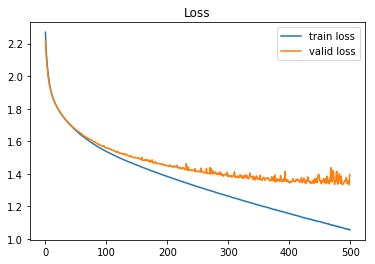

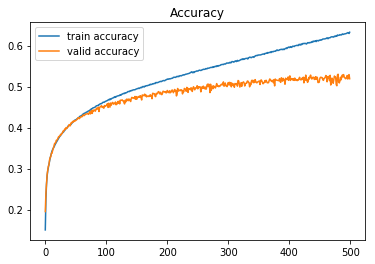

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()